# Generate population-only statistics for countries of interest
## Load all country data

In [3]:
import pandas
import data

df_country_stats = pandas.read_csv(data.data_dir+data.worldbank_data_filename, index_col=0)
df_country_stats.dropna(inplace=True)
print("Available data:")
print(df_country_stats.columns.values)
print(df_country_stats.index.values)

Available data:
['Population ages 80 and above, male (% of male population) in 2018'
 'Population ages 10-14, female (% of female population) in 2018'
 'Population density (people per sq. km of land area) in 2018'
 'Population ages 20-24, male (% of male population) in 2018'
 'Population ages 20-24, female (% of female population) in 2018'
 'Population ages 60-64, male (% of male population) in 2018'
 'Population ages 70-74, female (% of female population) in 2018'
 'Population ages 65-69, male (% of male population) in 2018'
 'Population ages 10-14, male (% of male population) in 2018'
 'Population ages 75-79, male (% of male population) in 2018'
 'Population, total in 2018'
 'Population ages 65-69, female (% of female population) in 2018'
 'Population ages 75-79, female (% of female population) in 2018'
 'Population ages 30-34, male (% of male population) in 2018'
 'Population ages 55-59, female (% of female population) in 2018'
 'Population ages 25-29, male (% of male population) in

## Drop all unnecessary data

In [4]:
# get available countries close to austria
austria_most_connected_available = list(set(data.most_connected_austria) & set(df_country_stats.index.values))

# get available countries eu + interesting
eu_plus_available = list(set(data.all_countries_eu_plus) & set(df_country_stats.index.values))

## Create output directory

In [5]:
import os

directory = "{}{}/".format(data.export_dir, 'population_stats')
if not os.path.exists(directory):
    os.makedirs(directory)

## Create and save country only statistics

In [18]:
selected_countries = eu_plus_available
#selected_countries = austria_most_connected_available

### Population Density

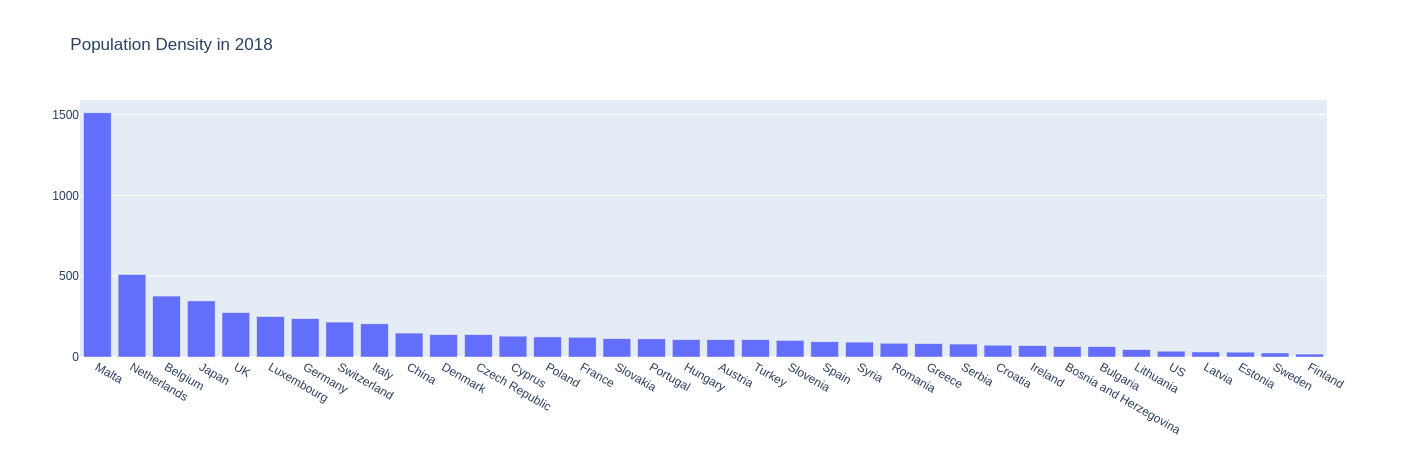

In [24]:
import lib.io as io
import plotly.graph_objects as go

title = "Population Density in 2018"
column_name = 'Population density (people per sq. km of land area) in 2018'

df_pop_density = df_country_stats.loc[selected_countries, [column_name]]
#print(df_pop_density)
df_pop_density.sort_values(column_name, axis=0, ascending=False, inplace=True)

fig = go.Figure()
fig.add_trace(go.Bar(x=df_pop_density.index, y=df_pop_density.round(0)[column_name]))
fig.update_layout(title_text=title)
#fig.show("png")
fig.show()
fig.write_image(directory+title+".png")
io.saveDataCsv(df_pop_density, directory, title)

### Total population

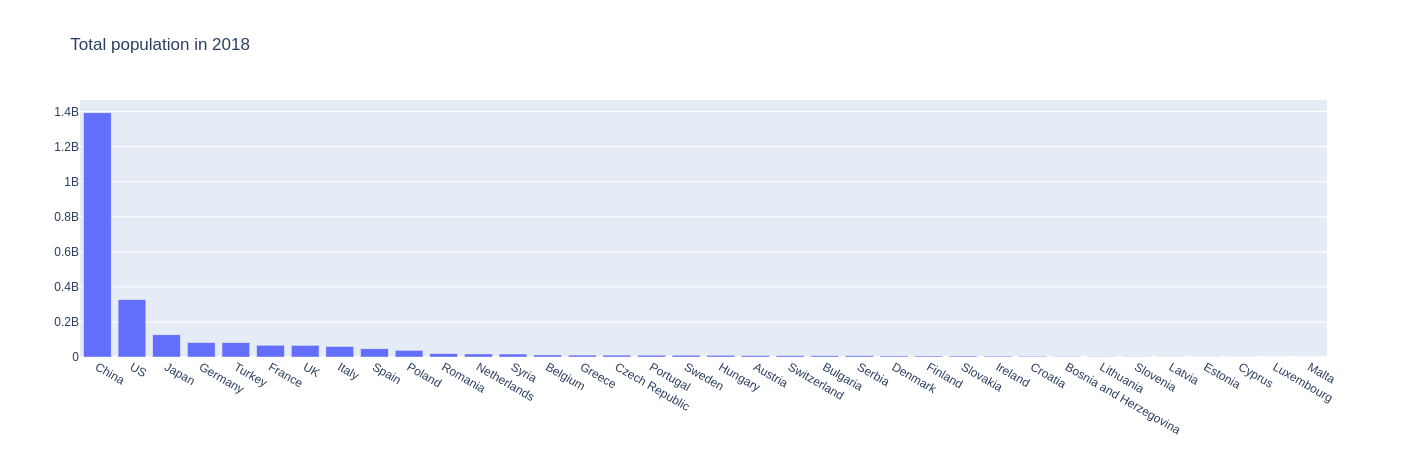

In [25]:
title = "Total population in 2018"
pop_tot_column_name = 'Population, total in 2018'

df_pop_tot = df_country_stats.loc[selected_countries, [pop_tot_column_name]]
#print(df_pop_tot)
df_pop_tot.sort_values(pop_tot_column_name, axis=0, ascending=False, inplace=True)

fig = go.Figure()
fig.add_trace(go.Bar(x=df_pop_tot.index, y=df_pop_tot.round(0)[pop_tot_column_name]))
fig.update_layout(title_text=title)
#fig.show("png")
fig.show()
fig.write_image(directory+title+".png")
io.saveDataCsv(df_pop_tot, directory, title)

### Total population by sex

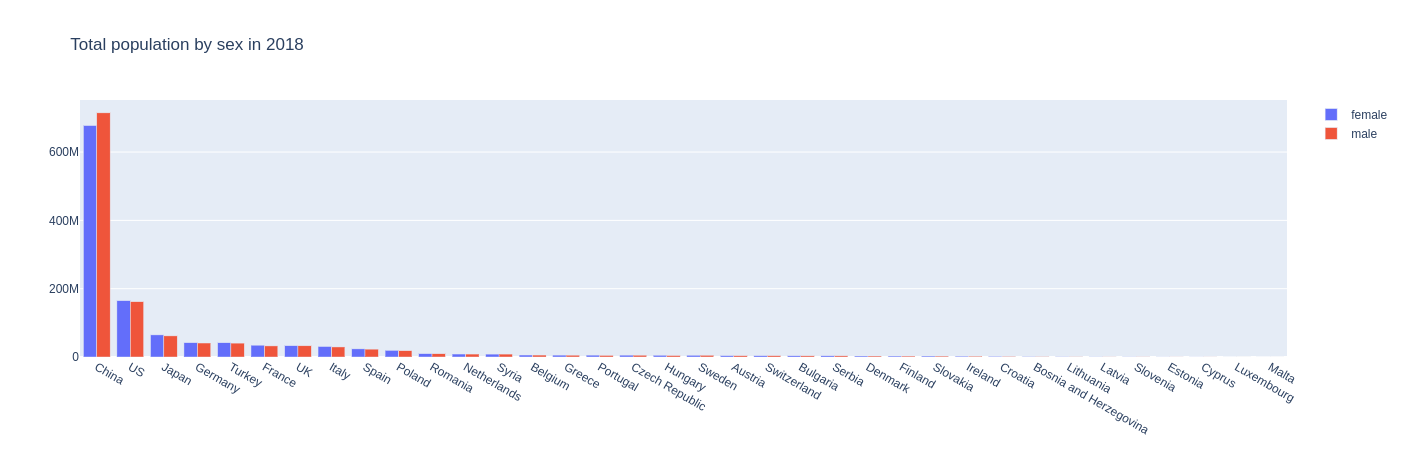

In [26]:
title = "Total population by sex in 2018"

pop_pct_female_column_name = 'Population, female (% of total population) in 2018'
pop_pct_male_column_name = 'Population, male (% of total population) in 2018'
src_column_names = [pop_tot_column_name, pop_pct_female_column_name, pop_pct_male_column_name]

pop_tot_female_column_name = 'Population, female in 2018'
pop_tot_male_column_name = 'Population, male in 2018'
dst_column_names = [pop_tot_female_column_name, pop_tot_male_column_name]

df_pop_tot_sex = df_country_stats.loc[selected_countries, src_column_names]
#print(df_pop_tot_sex)
df_pop_tot_sex[pop_tot_female_column_name] = df_pop_tot_sex.apply(lambda row: row[pop_tot_column_name]*row[pop_pct_female_column_name]/100, axis=1)
df_pop_tot_sex[pop_tot_male_column_name] = df_pop_tot_sex.apply(lambda row: row[pop_tot_column_name]*row[pop_pct_male_column_name]/100, axis=1)
df_pop_tot_sex = df_pop_tot_sex.loc[:, dst_column_names]
df_pop_tot_sex.sort_values(dst_column_names, axis=0, ascending=False, inplace=True)
#print(df_pop_tot_sex)

fig = go.Figure()
fig.add_trace(go.Bar(x=df_pop_tot_sex.index, y=df_pop_tot_sex[pop_tot_female_column_name], name="female"))
fig.add_trace(go.Bar(x=df_pop_tot_sex.index, y=df_pop_tot_sex[pop_tot_male_column_name], name="male"))
fig.update_layout(title_text=title, barmode='group')
#fig.show("png")
fig.show()
fig.write_image(directory+title+".png")
io.saveDataCsv(df_pop_tot_sex, directory, title)

### Risk groups as of age (70+) only

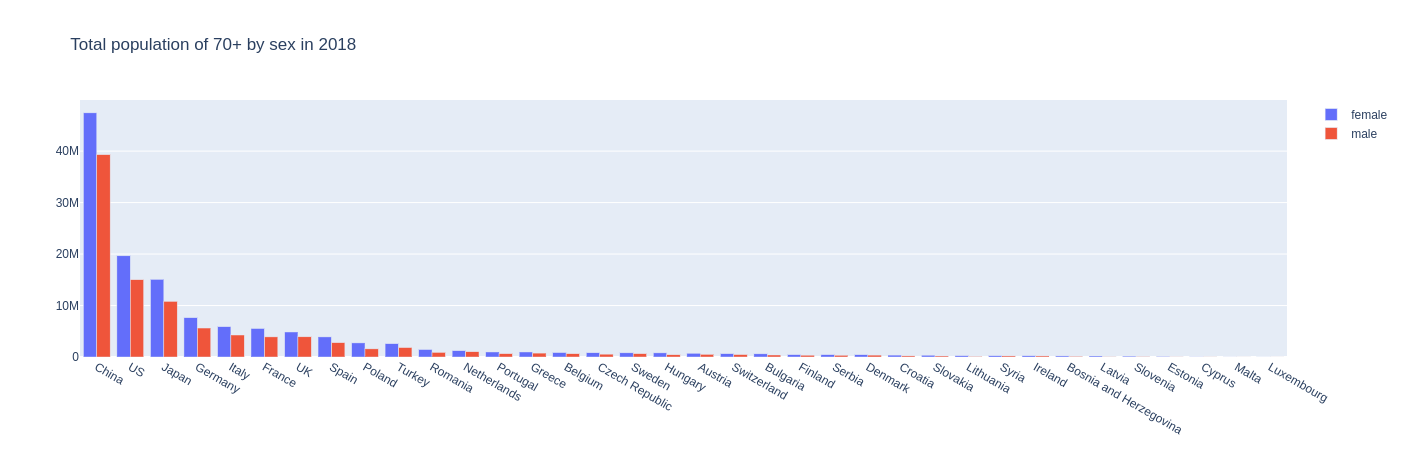

In [27]:
title = "Total population of 70+ by sex in 2018"

pop_pct_female_80ff = 'Population ages 80 and above, female (% of female population) in 2018'
pop_pct_female_7579 = 'Population ages 75-79, female (% of female population) in 2018'
pop_pct_female_7074 = 'Population ages 70-74, female (% of female population) in 2018'
pop_pct_male_80ff = 'Population ages 80 and above, male (% of male population) in 2018'
pop_pct_male_7579 = 'Population ages 75-79, male (% of male population) in 2018'
pop_pct_male_7074 = 'Population ages 70-74, male (% of male population) in 2018'
src_column_names = [pop_tot_column_name,
                    pop_pct_female_column_name, pop_pct_male_column_name,
                    pop_pct_female_80ff, pop_pct_female_7579, pop_pct_female_7074,
                    pop_pct_male_80ff, pop_pct_male_7579, pop_pct_male_7074]

pop_tot_female_70ff_column_name = 'Population ages 70 and above, female in 2018'
pop_tot_male_70ff_column_name = 'Population ages 70 and above, male in 2018'
dst_column_names = [pop_tot_female_70ff_column_name, pop_tot_male_70ff_column_name]

df_pop_tot_risk_sex = df_country_stats.loc[selected_countries, src_column_names]
#print(df_pop_tot_sex)

def sum_cols_to(df, src_cols, dst_col):
    df[dst_col] = 0
    for src_col in src_cols:
        df[dst_col] = df[dst_col] + df[src_col]

sum_cols_to(df_pop_tot_risk_sex, [pop_pct_female_80ff, pop_pct_female_7579, pop_pct_female_7074], pop_tot_female_70ff_column_name)
#print(df_pop_tot_risk_sex[[pop_pct_female_80ff, pop_pct_female_7579, pop_pct_female_7074]])
#print(df_pop_tot_risk_sex[[pop_tot_female_70ff_column_name, pop_pct_female_column_name, pop_tot_column_name]])
df_pop_tot_risk_sex[pop_tot_female_70ff_column_name] = df_pop_tot_risk_sex[pop_tot_female_70ff_column_name]/100
#print(df_pop_tot_risk_sex[pop_tot_female_70ff_column_name])
df_pop_tot_risk_sex[pop_tot_female_70ff_column_name] = df_pop_tot_risk_sex.apply(lambda row: row[pop_tot_female_70ff_column_name]*row[pop_tot_column_name]*row[pop_pct_female_column_name]/100, axis=1)

sum_cols_to(df_pop_tot_risk_sex, [pop_pct_male_80ff, pop_pct_male_7579, pop_pct_male_7074], pop_tot_male_70ff_column_name)
df_pop_tot_risk_sex[pop_tot_male_70ff_column_name] = df_pop_tot_risk_sex[pop_tot_male_70ff_column_name]/100
df_pop_tot_risk_sex[pop_tot_male_70ff_column_name] = df_pop_tot_risk_sex.apply(lambda row: row[pop_tot_male_70ff_column_name]*row[pop_tot_column_name]*row[pop_pct_male_column_name]/100, axis=1)
df_pop_tot_risk_sex = df_pop_tot_risk_sex.loc[:, dst_column_names]
df_pop_tot_risk_sex.sort_values(dst_column_names, axis=0, ascending=False, inplace=True)
#print(df_pop_tot_risk_sex)

fig = go.Figure()
fig.add_trace(go.Bar(x=df_pop_tot_risk_sex.index, y=df_pop_tot_risk_sex[pop_tot_female_70ff_column_name], name="female"))
fig.add_trace(go.Bar(x=df_pop_tot_risk_sex.index, y=df_pop_tot_risk_sex[pop_tot_male_70ff_column_name], name="male"))
fig.update_layout(title_text=title, barmode='group')
#fig.show("png")
fig.show()
fig.write_image(directory+title+".png")
io.saveDataCsv(df_pop_tot_sex, directory, title)

## Age groups

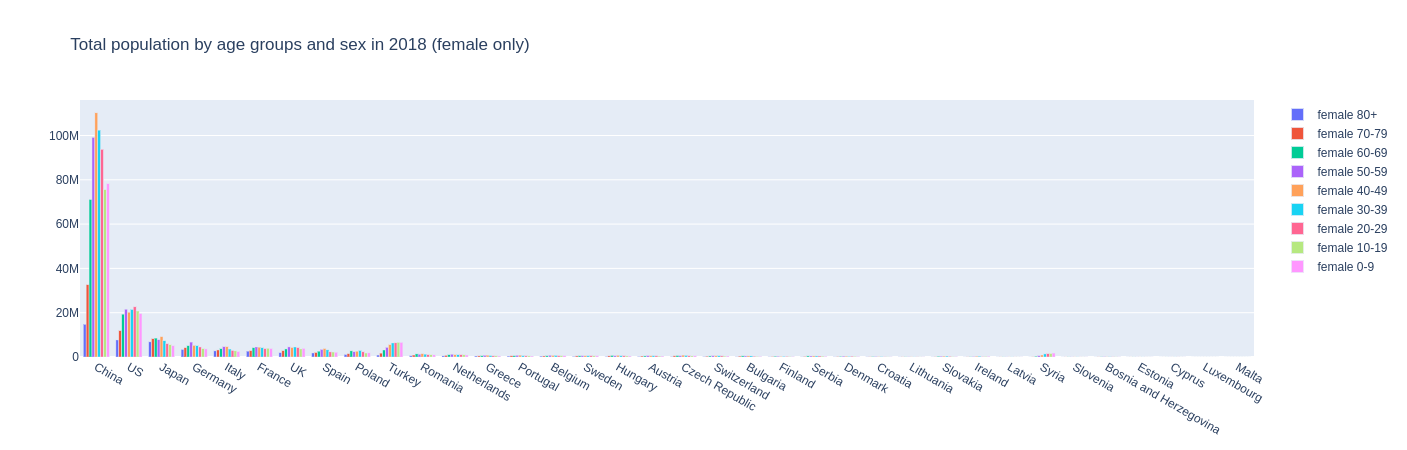

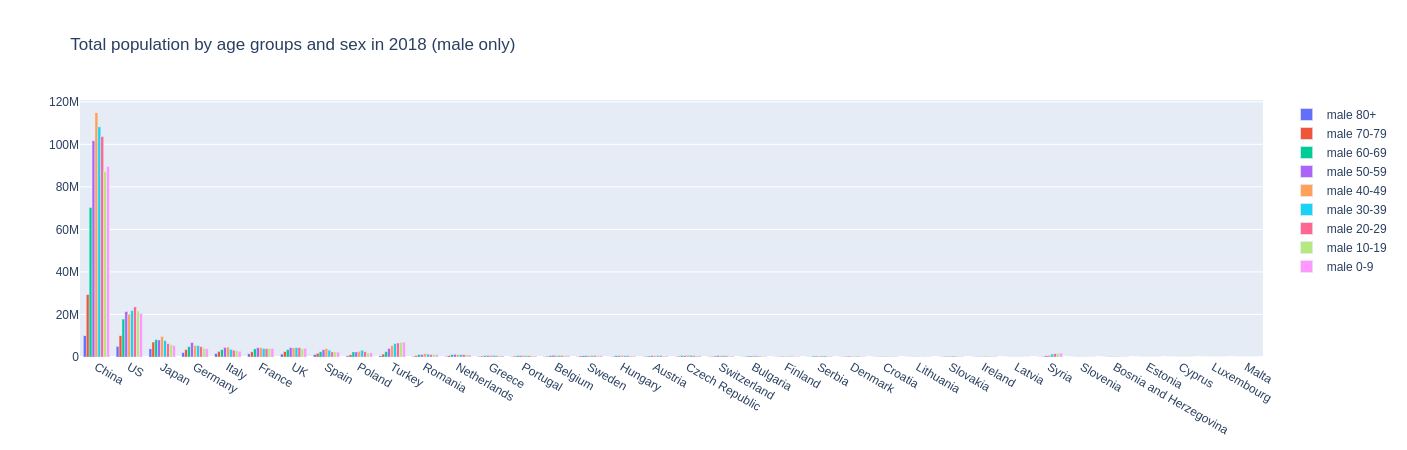

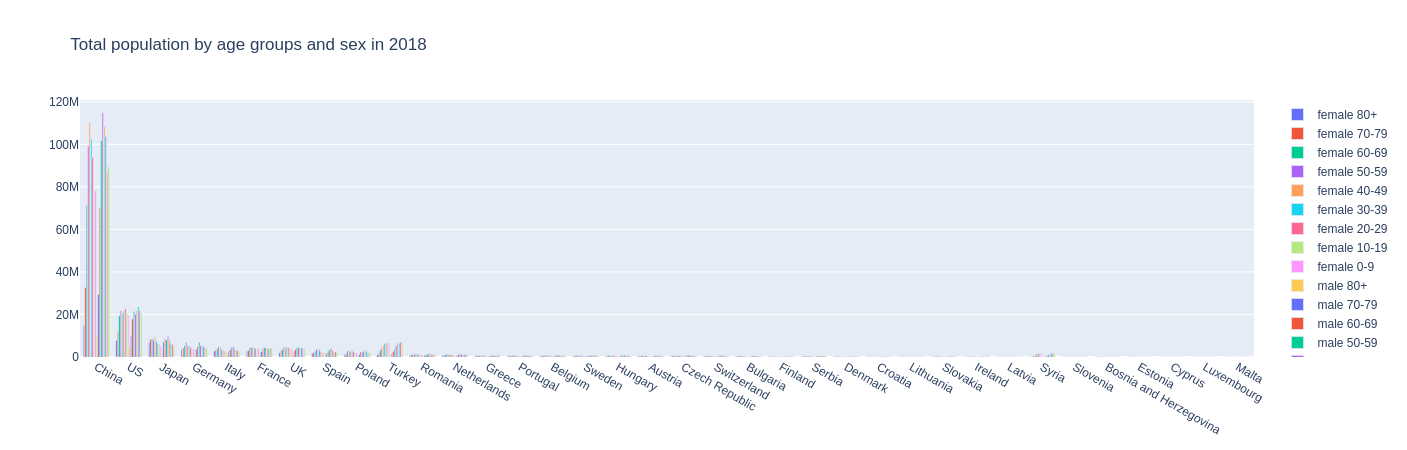

In [28]:
# Age groups as on https://www.worldometers.info/coronavirus/coronavirus-age-sex-demographics/
#80+ years old
#70-79 years old
#60-69 years old
#50-59 years old
#40-49 years old
#30-39 years old
#20-29 years old
#10-19 years old
#0-9 years old

title = "Total population by age groups and sex in 2018"

pop_pct_female_6569 = 'Population ages 65-69, female (% of female population) in 2018'
pop_pct_female_6064 = 'Population ages 60-64, female (% of female population) in 2018'
pop_pct_female_5559 = 'Population ages 55-59, female (% of female population) in 2018'
pop_pct_female_5054 = 'Population ages 50-54, female (% of female population) in 2018'
pop_pct_female_4549 = 'Population ages 45-49, female (% of female population) in 2018'
pop_pct_female_4044 = 'Population ages 40-44, female (% of female population) in 2018'
pop_pct_female_3539 = 'Population ages 35-39, female (% of female population) in 2018'
pop_pct_female_3034 = 'Population ages 30-34, female (% of female population) in 2018'
pop_pct_female_2529 = 'Population ages 25-29, female (% of female population) in 2018'
pop_pct_female_2024 = 'Population ages 20-24, female (% of female population) in 2018'
pop_pct_female_1519 = 'Population ages 15-19, female (% of female population) in 2018'
pop_pct_female_1014 = 'Population ages 10-14, female (% of female population) in 2018'
pop_pct_female_0509 = 'Population ages 05-09, female (% of female population) in 2018'
pop_pct_female_0004 = 'Population ages 00-04, female (% of female population) in 2018'

pop_pct_male_6569 = 'Population ages 65-69, male (% of male population) in 2018'
pop_pct_male_6064 = 'Population ages 60-64, male (% of male population) in 2018'
pop_pct_male_5559 = 'Population ages 55-59, male (% of male population) in 2018'
pop_pct_male_5054 = 'Population ages 50-54, male (% of male population) in 2018'
pop_pct_male_4549 = 'Population ages 45-49, male (% of male population) in 2018'
pop_pct_male_4044 = 'Population ages 40-44, male (% of male population) in 2018'
pop_pct_male_3539 = 'Population ages 35-39, male (% of male population) in 2018'
pop_pct_male_3034 = 'Population ages 30-34, male (% of male population) in 2018'
pop_pct_male_2529 = 'Population ages 25-29, male (% of male population) in 2018'
pop_pct_male_2024 = 'Population ages 20-24, male (% of male population) in 2018'
pop_pct_male_1519 = 'Population ages 15-19, male (% of male population) in 2018'
pop_pct_male_1014 = 'Population ages 10-14, male (% of male population) in 2018'
pop_pct_male_0509 = 'Population ages 05-09, male (% of male population) in 2018'
pop_pct_male_0004 = 'Population ages 00-04, male (% of male population) in 2018'

src_column_names = [pop_tot_column_name,
                    pop_pct_female_column_name, pop_pct_male_column_name,
                    pop_pct_female_80ff,
                    pop_pct_female_7579, pop_pct_female_7074,
                    pop_pct_female_6569, pop_pct_female_6064,
                    pop_pct_female_5559, pop_pct_female_5054,
                    pop_pct_female_4549, pop_pct_female_4044,
                    pop_pct_female_3539, pop_pct_female_3034,
                    pop_pct_female_2529, pop_pct_female_2024,
                    pop_pct_female_1519, pop_pct_female_1014,
                    pop_pct_female_0509, pop_pct_female_0004,
                    pop_pct_male_80ff,
                    pop_pct_male_7579, pop_pct_male_7074,
                    pop_pct_male_6569, pop_pct_male_6064,
                    pop_pct_male_5559, pop_pct_male_5054,
                    pop_pct_male_4549, pop_pct_male_4044,
                    pop_pct_male_3539, pop_pct_male_3034,
                    pop_pct_male_2529, pop_pct_male_2024,
                    pop_pct_male_1519, pop_pct_male_1014,
                    pop_pct_male_0509, pop_pct_male_0004]

pop_tot_female_80ff_column_name = 'Population ages 80 and above, female in 2018'
pop_tot_female_7079_column_name = 'Population ages 70-79, female in 2018'
pop_tot_female_6069_column_name = 'Population ages 60-69, female in 2018'
pop_tot_female_5059_column_name = 'Population ages 50-59, female in 2018'
pop_tot_female_4049_column_name = 'Population ages 40-49, female in 2018'
pop_tot_female_3039_column_name = 'Population ages 30-39, female in 2018'
pop_tot_female_2029_column_name = 'Population ages 20-29, female in 2018'
pop_tot_female_1019_column_name = 'Population ages 10-19, female in 2018'
pop_tot_female_0009_column_name = 'Population ages 0-9, female in 2018'

pop_tot_male_80ff_column_name = 'Population ages 80 and above, male in 2018'
pop_tot_male_7079_column_name = 'Population ages 70-79, male in 2018'
pop_tot_male_6069_column_name = 'Population ages 60-69, male in 2018'
pop_tot_male_5059_column_name = 'Population ages 50-59, male in 2018'
pop_tot_male_4049_column_name = 'Population ages 40-49, male in 2018'
pop_tot_male_3039_column_name = 'Population ages 30-39, male in 2018'
pop_tot_male_2029_column_name = 'Population ages 20-29, male in 2018'
pop_tot_male_1019_column_name = 'Population ages 10-19, male in 2018'
pop_tot_male_0009_column_name = 'Population ages 0-9, male in 2018'

dst_column_names = [pop_tot_female_80ff_column_name, pop_tot_female_7079_column_name, pop_tot_female_6069_column_name, pop_tot_female_5059_column_name,
                    pop_tot_female_4049_column_name, pop_tot_female_3039_column_name, pop_tot_female_2029_column_name, pop_tot_female_1019_column_name, pop_tot_female_0009_column_name,
                    pop_tot_male_80ff_column_name, pop_tot_male_7079_column_name, pop_tot_male_6069_column_name, pop_tot_male_5059_column_name, pop_tot_male_4049_column_name,
                    pop_tot_male_3039_column_name, pop_tot_male_2029_column_name, pop_tot_male_1019_column_name, pop_tot_male_0009_column_name]

df_pop_tot_age_groups_sex = df_country_stats.loc[selected_countries, src_column_names]


# sum up within groups
df_pop_tot_age_groups_sex[pop_tot_female_80ff_column_name] = df_pop_tot_age_groups_sex[pop_pct_female_80ff]
sum_cols_to(df_pop_tot_age_groups_sex, [pop_pct_female_7074, pop_pct_female_7579], pop_tot_female_7079_column_name)
sum_cols_to(df_pop_tot_age_groups_sex, [pop_pct_female_6064, pop_pct_female_6569], pop_tot_female_6069_column_name)
sum_cols_to(df_pop_tot_age_groups_sex, [pop_pct_female_5054, pop_pct_female_5559], pop_tot_female_5059_column_name)
sum_cols_to(df_pop_tot_age_groups_sex, [pop_pct_female_4044, pop_pct_female_4549], pop_tot_female_4049_column_name)
sum_cols_to(df_pop_tot_age_groups_sex, [pop_pct_female_3034, pop_pct_female_3539], pop_tot_female_3039_column_name)
sum_cols_to(df_pop_tot_age_groups_sex, [pop_pct_female_2024, pop_pct_female_2529], pop_tot_female_2029_column_name)
sum_cols_to(df_pop_tot_age_groups_sex, [pop_pct_female_1014, pop_pct_female_1519], pop_tot_female_1019_column_name)
sum_cols_to(df_pop_tot_age_groups_sex, [pop_pct_female_0004, pop_pct_female_0509], pop_tot_female_0009_column_name)

df_pop_tot_age_groups_sex[pop_tot_male_80ff_column_name] = df_pop_tot_age_groups_sex[pop_pct_male_80ff]
sum_cols_to(df_pop_tot_age_groups_sex, [pop_pct_male_7074, pop_pct_male_7579], pop_tot_male_7079_column_name)
sum_cols_to(df_pop_tot_age_groups_sex, [pop_pct_male_6064, pop_pct_male_6569], pop_tot_male_6069_column_name)
sum_cols_to(df_pop_tot_age_groups_sex, [pop_pct_male_5054, pop_pct_male_5559], pop_tot_male_5059_column_name)
sum_cols_to(df_pop_tot_age_groups_sex, [pop_pct_male_4044, pop_pct_male_4549], pop_tot_male_4049_column_name)
sum_cols_to(df_pop_tot_age_groups_sex, [pop_pct_male_3034, pop_pct_male_3539], pop_tot_male_3039_column_name)
sum_cols_to(df_pop_tot_age_groups_sex, [pop_pct_male_2024, pop_pct_male_2529], pop_tot_male_2029_column_name)
sum_cols_to(df_pop_tot_age_groups_sex, [pop_pct_male_1014, pop_pct_male_1519], pop_tot_male_1019_column_name)
sum_cols_to(df_pop_tot_age_groups_sex, [pop_pct_male_0004, pop_pct_male_0509], pop_tot_male_0009_column_name)


# calculate percent to decimal (divide by 100)
def div_by_100_col(df, column):
    df[column] = df[column]/100

for col in [pop_tot_female_80ff_column_name, pop_tot_female_7079_column_name, pop_tot_female_6069_column_name, pop_tot_female_5059_column_name, pop_tot_female_4049_column_name, 
            pop_tot_female_3039_column_name, pop_tot_female_2029_column_name, pop_tot_female_1019_column_name, pop_tot_female_0009_column_name,
            pop_tot_male_80ff_column_name, pop_tot_male_7079_column_name, pop_tot_male_6069_column_name, pop_tot_male_5059_column_name, pop_tot_male_4049_column_name, 
            pop_tot_male_3039_column_name, pop_tot_male_2029_column_name, pop_tot_male_1019_column_name, pop_tot_male_0009_column_name]:
    div_by_100_col(df_pop_tot_age_groups_sex, col)


# get abs from relative
def row_rel_to_abs_female(row):
    return row[pop_tot_column_name]*row[pop_pct_female_column_name]/100
def row_rel_to_abs_male(row):
    return row[pop_tot_column_name]*row[pop_pct_male_column_name]/100

for col in [pop_tot_female_80ff_column_name, pop_tot_female_7079_column_name, pop_tot_female_6069_column_name, pop_tot_female_5059_column_name, pop_tot_female_4049_column_name, 
            pop_tot_female_3039_column_name, pop_tot_female_2029_column_name, pop_tot_female_1019_column_name, pop_tot_female_0009_column_name]:
    df_pop_tot_age_groups_sex[col] = df_pop_tot_age_groups_sex.apply(lambda row: row[col]*row_rel_to_abs_female(row), axis=1)

for col in [pop_tot_male_80ff_column_name, pop_tot_male_7079_column_name, pop_tot_male_6069_column_name, pop_tot_male_5059_column_name, pop_tot_male_4049_column_name, 
            pop_tot_male_3039_column_name, pop_tot_male_2029_column_name, pop_tot_male_1019_column_name, pop_tot_male_0009_column_name]:
    df_pop_tot_age_groups_sex[col] = df_pop_tot_age_groups_sex.apply(lambda row: row[col]*row_rel_to_abs_male(row), axis=1)


# select only the output columns
df_pop_tot_age_groups_sex = df_pop_tot_age_groups_sex.loc[:, dst_column_names]
df_pop_tot_age_groups_sex.sort_values(dst_column_names, axis=0, ascending=False, inplace=True)

# generate the graph
def add_trace_for_col(fig, df, col, name):
    fig.add_trace(go.Bar(x=df.index, y=df[col], name=name))

fig_title = title+" (female only)"
fig = go.Figure()
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_80ff_column_name, "female 80+")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_7079_column_name, "female 70-79")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_6069_column_name, "female 60-69")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_5059_column_name, "female 50-59")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_4049_column_name, "female 40-49")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_3039_column_name, "female 30-39")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_2029_column_name, "female 20-29")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_1019_column_name, "female 10-19")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_0009_column_name, "female 0-9")
fig.update_layout(title_text=fig_title, barmode='group')
#fig.show("png")
fig.show()
fig.write_image(directory+fig_title+".png")

fig_title = title+" (male only)"
fig = go.Figure()
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_80ff_column_name, "male 80+")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_7079_column_name, "male 70-79")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_6069_column_name, "male 60-69")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_5059_column_name, "male 50-59")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_4049_column_name, "male 40-49")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_3039_column_name, "male 30-39")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_2029_column_name, "male 20-29")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_1019_column_name, "male 10-19")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_0009_column_name, "male 0-9")
fig.update_layout(title_text=fig_title, barmode='group')
#fig.show("png")
fig.show()
fig.write_image(directory+fig_title+".png")

fig = go.Figure()
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_80ff_column_name, "female 80+")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_7079_column_name, "female 70-79")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_6069_column_name, "female 60-69")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_5059_column_name, "female 50-59")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_4049_column_name, "female 40-49")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_3039_column_name, "female 30-39")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_2029_column_name, "female 20-29")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_1019_column_name, "female 10-19")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_female_0009_column_name, "female 0-9")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_80ff_column_name, "male 80+")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_7079_column_name, "male 70-79")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_6069_column_name, "male 60-69")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_5059_column_name, "male 50-59")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_4049_column_name, "male 40-49")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_3039_column_name, "male 30-39")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_2029_column_name, "male 20-29")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_1019_column_name, "male 10-19")
add_trace_for_col(fig, df_pop_tot_age_groups_sex, pop_tot_male_0009_column_name, "male 0-9")
fig.update_layout(title_text=title, barmode='group')
#fig.show("png")
fig.show()
fig.write_image(directory+title+".png")

io.saveDataCsv(df_pop_tot_age_groups_sex, directory, title)